In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score



In [17]:
heart_disease=pd.read_csv("heart_disease.csv")
heart_disease.isna().sum(),heart_disease.describe()

(age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64,
               age         sex          cp    trestbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg     thalach     

<Axes: xlabel='target'>

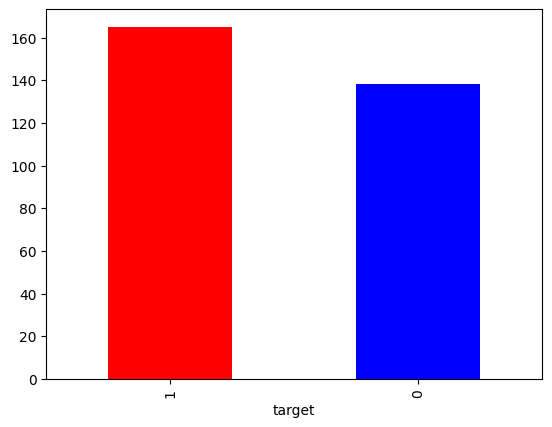

In [26]:
heart_disease['target'].value_counts().plot(kind='bar',color=['red','blue'])


In [27]:
pd.crosstab(heart_disease['sex'],heart_disease['target'])

target,0,1
sex,,
0,24,72
1,114,93


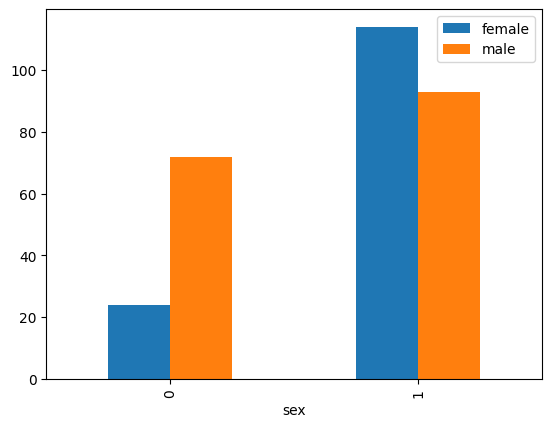

In [32]:
pd.crosstab(heart_disease['sex'],heart_disease['target']).plot(kind='bar')
plt.legend(['female','male'])

In [63]:
data_filtering=heart_disease[heart_disease['target']==1]
data_filtering_2=heart_disease[heart_disease['target']==0]

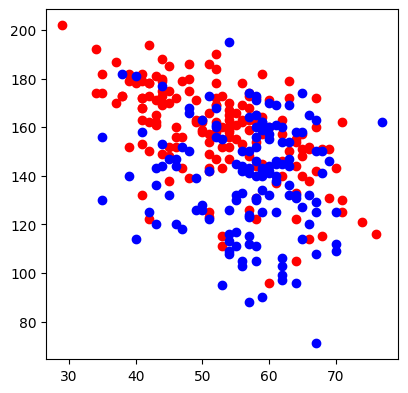

In [67]:
plt.figure(figsize=(10, 10))


axes1 = plt.subplot(2, 2, 1)
axes1.scatter(data_filtering['age'], data_filtering['thalach'], c='red')
axes1.scatter(data_filtering_2['age'],data_filtering_2['thalach'],c='blue')


In [68]:
pd.crosstab(heart_disease.cp,heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0, 0.5, 'target amount')

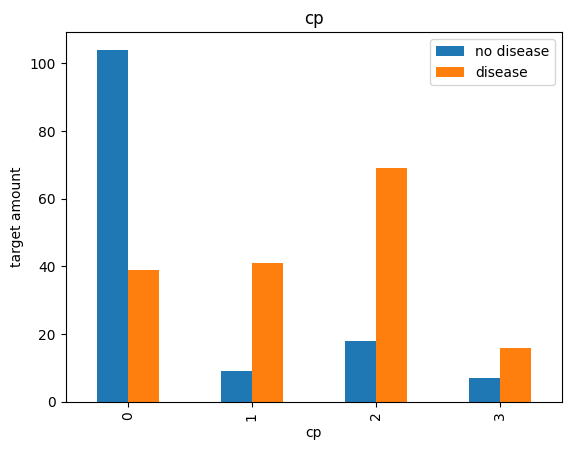

In [73]:
pd.crosstab(heart_disease.cp,heart_disease.target).plot(kind='bar')
plt.legend(['no disease','disease'])
plt.title('cp')
plt.xlabel('cp')
plt.ylabel('target amount')

In [75]:
matrix=heart_disease.corr()

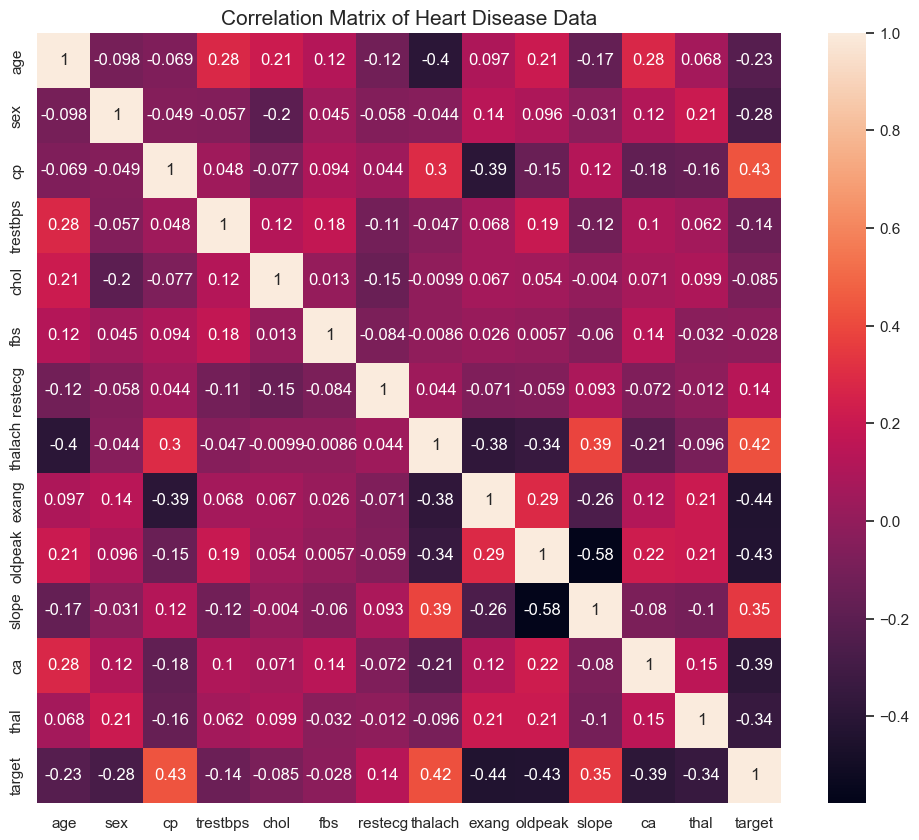

In [88]:
matrix=heart_disease.corr()
sns.set_theme()
plt.figure(figsize=(12, 10))
ax = sns.heatmap(matrix, annot=True)
plt.title('Correlation Matrix of Heart Disease Data', size=15);

In [98]:
X=heart_disease.drop('target',axis=1)
Y=heart_disease['target']

In [99]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [110]:
models={"Logistic Regression":LogisticRegression(),
  "KNeighbors Classifier":KNeighborsClassifier(),
"Random Forest Classifier":RandomForestClassifier()}

def fit_score_model(models,X_train,X_test,Y_train,Y_test):
    model_Score={}
    np.random.seed(42)
    for name,models in models.items():
        models.fit(X_train,Y_train)
        model_Score[name]=models.score(X_test,Y_test)
    return model_Score
    

In [111]:
model_Scores=fit_score_model(models=models,X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test)
model_Scores

C:\Users\Qadri laptop\Desktop\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNeighbors Classifier': 0.639344262295082,
 'Random Forest Classifier': 0.8360655737704918}

<Axes: >

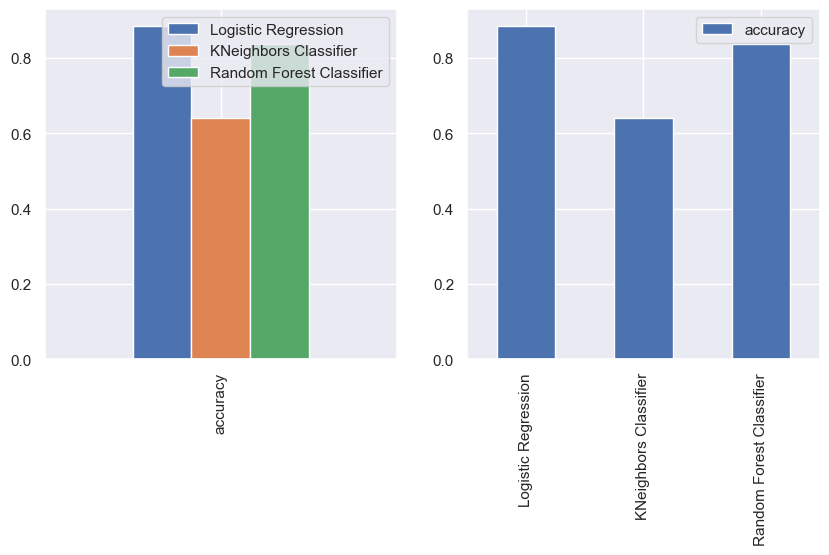

In [127]:
model_Score=pd.DataFrame(model_Scores,index=['accuracy'])
plt.figure(figsize=(10, 10))
axes1 = plt.subplot(2, 2, 1)
model_Score.plot(kind='bar',ax=axes1)
axes2 = plt.subplot(2, 2, 2)
model_Score.T.plot(kind='bar',ax=axes2)

In [135]:
knn=KNeighborsClassifier()
neighbours=range(1,30)
train_Scores=[]
test_Scores=[]
for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,Y_train)
    knn.score(X_test,Y_test)
    train_Scores.append(knn.score(X_train,Y_train))
    test_Scores.append(knn.score(X_test,Y_test))


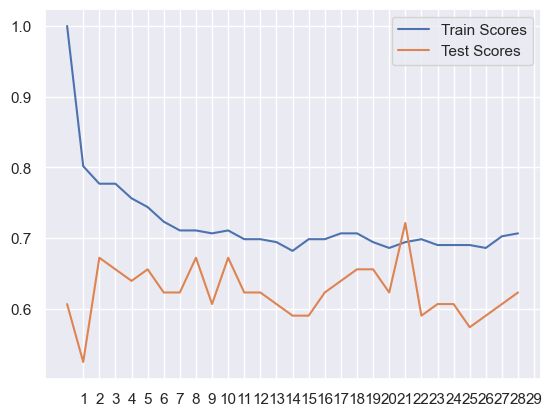

In [150]:
plt.plot(train_Scores,label='Train Scores')
plt.plot(test_Scores,label='Test Scores')
plt.legend()
plt.xticks(np.arange(1,30,1));

In [167]:
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']  
}

random_forest_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10], 
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": ['sqrt', 'log2', None]  
}

In [172]:
log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [178]:
log_reg_best_params = log_reg.best_params_
print("Best parameters for Logistic Regression:", log_reg_best_params)

Best parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.08858667904100823}


In [183]:
random_forest=RandomizedSearchCV(RandomForestClassifier(),param_distributions=random_forest_grid,cv=5,n_iter=20,verbose=True)
random_forest.fit(X_train,Y_train)
random_forest_best_params=random_forest.best_params_
print("Best parameters for Random Forest Classifier:", random_forest_best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Random Forest Classifier: {'n_estimators': 10, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 5}


In [193]:
log_reg.best_score_

0.8181972789115648

In [186]:
random_forest.best_score_

0.8431122448979591

In [195]:
log_reg.score(X_test,Y_test)

0.8524590163934426

In [198]:
best_rf_model = random_forest.best_estimator_
test_score = best_rf_model.score(X_test, Y_test)
print("Test score with best parameters for RFC:", test_score)


Test score with best parameters for RFC: 0.819672131147541


In [199]:
best_LR_model=log_reg.best_estimator_
test_score = best_LR_model.score(X_test, Y_test)
print("Test score with best parameters for LR:", test_score)

Test score with best parameters for LR: 0.8524590163934426


In [202]:
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']  
}

GSCV=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
GSCV.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [204]:
best_LR_model=log_reg.best_estimator_

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [205]:
best_LR_model.score(X_train,Y_train)

0.8305785123966942

In [206]:
GSCV.score(X_train,Y_train)

0.8305785123966942

In [211]:
y_preds=best_LR_model.predict(X_test)
y_preds,Y_test

(array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64),
 171    0
 162    1
 220    0
 217    0
 95     1
       ..
 246    0
 269    0
 233    0
 110    1
 291    0
 Name: target, Length: 61, dtype: int64)

In [214]:
pip install --upgrade scikit-learn


   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.9 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.9 MB 655.4 kB/s eta 0:00:17
    --------------------------------------- 0.1/10.9 MB 778.5 kB/s eta 0:00:14
    --------------------------------------- 0.1/10.9 MB 778.5 kB/s eta 0:00:14
    --------------------------------------- 0.1/10.9 MB 778.5 kB/s eta 0:00:14
    --------------------------------------- 0.1/10.9 MB 778.5 kB/s eta 0:00:14
    --------------------------------------- 0.1/10.9 MB 778.5 kB/s eta 0:00:14
   - -------------------------------------- 0.3/10.9 MB 682.7 kB/s eta 0:00:16
   - -------------------------------------- 0.3/10.9 MB 632.7 kB/s eta 0:00:17
   - -------------------------------------- 0.3/10.9 MB 636.3 kB/s eta 0:00:17
   - -------------------------------------- 0.4/10.9 MB 656.4

<Axes: >

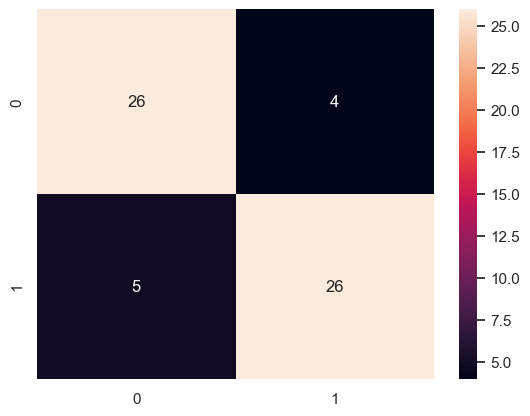

In [237]:
sns.set_theme()
mat=confusion_matrix(Y_test,y_preds)
sns.heatmap(mat,annot=True)

In [241]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.87      0.84      0.85        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [257]:
value=cross_val_score(best_LR_model,X_train,Y_train,cv=5,scoring='accuracy')
value=np.mean(value)

In [256]:
cv_p=cross_val_score(best_LR_model,X_train,Y_train,cv=5,scoring='precision')
cv_p=np.mean(cv_p)

In [258]:
cv_f1=cross_val_score(best_LR_model,X_train,Y_train,cv=5,scoring='f1')
cv_f1=np.mean(cv_f1)

In [259]:
cv_recall=cross_val_score(best_LR_model,X_train,Y_train,cv=5,scoring='recall')
cv_recall=np.mean(cv_recall)

<Axes: >

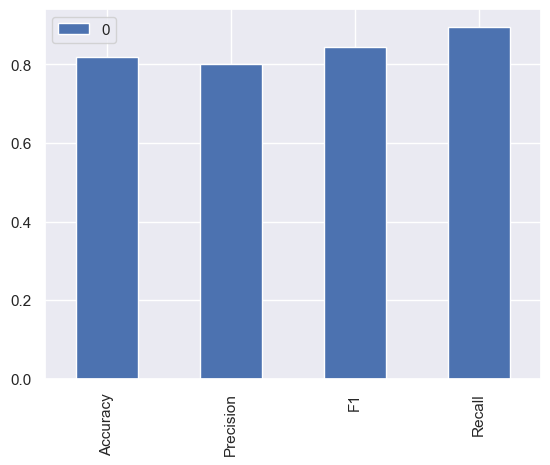

In [271]:
DATA=pd.DataFrame({"Accuracy":[value],'Precision':[cv_p],'F1':[cv_f1],'Recall':[cv_recall]})
DATA.T.plot(kind='bar')

In [278]:
from sklearn.metrics import roc_curve
fpr,tpr=roc_curve(Y_test,y_preds)

ValueError: too many values to unpack (expected 2)

In [286]:
best_LR_model.fit(X_train,Y_train)
prediction=best_LR_model.predict_proba(X_test)
prediction=prediction[:,1]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,prediction)

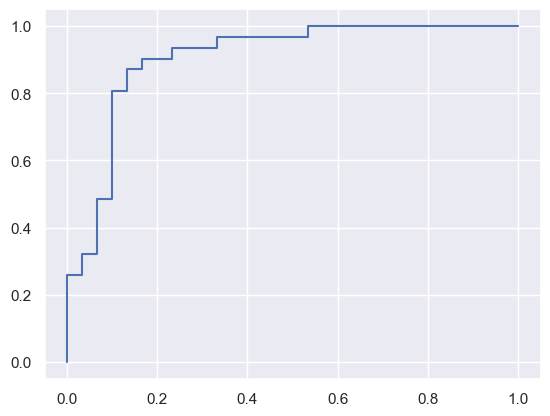

In [288]:
plt.plot(fpr,tpr);

In [291]:
coef=best_LR_model.coef_[0]

In [295]:
feature_dic = dict(zip(heart_disease.columns,list(coef)))
feature_dic

{'age': -0.0058355791292359,
 'sex': -0.5719297591291835,
 'cp': 0.6399130362581877,
 'trestbps': -0.020518340489996803,
 'chol': -0.0006236146085765242,
 'fbs': -0.05198566452516295,
 'restecg': 0.18824711352543416,
 'thalach': 0.03172637013928707,
 'exang': -0.2826728475866794,
 'oldpeak': -0.2868605631939518,
 'slope': 0.14830515239914818,
 'ca': -0.5183287697236533,
 'thal': -0.5411397926334588}

<Axes: >

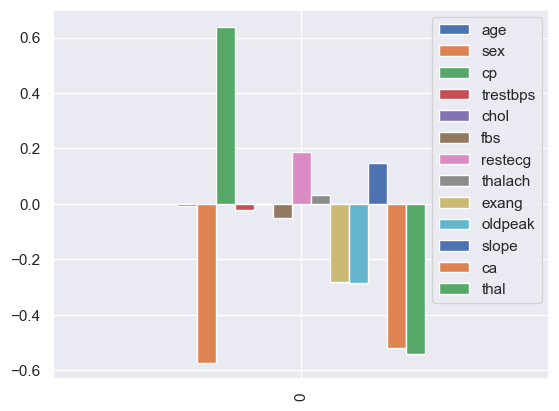

In [302]:
data=pd.DataFrame(feature_dic,index=[0])
data.plot(kind='bar')